# Cardano's Method for Cubic Equations: A Step-by-Step Tutorial with AutoRoot

## Introduction

Welcome to this interactive Jupyter Notebook!

![Solving cubic polynomials](https://github.com/ducoffeM/AutoRoot/blob/main/docs/assets/https://github.com/ducoffeM/AutoRoot/blob/main/docs/assets/Gemini_Generated_Cardano.jpeg "Cardano's method")

Polynomial equations of degree three, commonly known as cubic equations, are fundamental in many fields, from physics and engineering to computer graphics. While numerical methods can approximate their roots, classical algebraic solutions provide exact formulas. Among these, **Cardano's method** stands out as a powerful and elegant technique.

1.  **Discover `autoroot`**, your new, fast, and fully differentiable PyTorch library for solving cubic and quartic equations.
2.  **Witness the power of differentiability** in `autoroot`, showcasing how it seamlessly integrates with PyTorch's `autograd` system for advanced applications.

Let's dive in!

---

In [1]:
# On Colab: install the library
on_colab = "google.colab" in str(get_ipython())
if on_colab:
    import sys  # noqa: avoid having this import removed by pycln

    # install dev version for dev doc, or release version for release doc
    !{sys.executable} -m pip install -U pip
    !{sys.executable} -m pip install git+https://github.com/ducoffeM/AutoRoot@main#egg=decomon
    # install desired backend (by default torch)
    !{sys.executable} -m pip install "torch"

    # extra librabry used in this notebook
    !{sys.executable} -m pip install "numpy"
    !{sys.executable} -m pip install "cmath"
    !{sys.executable} -m pip install "matplotlib"

---

### Summarizing Cardano's Method for Cubic Equations

Cardano's method provides an algebraic approach to find the roots of any general cubic equation in the form $ax^3 + bx^2 + cx + d = 0$. The process involves a series of transformations:

1.  **Normalize the Equation:**
    * Divide the entire equation by the leading coefficient $a$ to get a monic cubic: $x^3 + Px^2 + Qx + R = 0$.
2.  **Depress the Cubic:**
    * Perform a substitution $x = y - P/3$. This eliminates the $x^2$ term, transforming the equation into a simpler "depressed" form: $y^3 + py + q = 0$.
3.  **Solve the Depressed Cubic:**
    * This is the core step. By setting $y = u + v$ and imposing the condition $3uv + p = 0$, the equation simplifies.
    * This leads to $u^3$ and $v^3$ being the roots of an auxiliary quadratic equation: $t^2 + qt - p^3/27 = 0$.
    * Solve this quadratic for $t$ to find $u^3$ and $v^3$.
    * Obtain $u$ and $v$ by taking the cube roots (considering all three complex cube roots for each) and carefully pairing them such that $uv = -p/3$. This yields the three roots for $y$.
4.  **Back-Substitute:**
    * Finally, use the initial substitution $x = y - P/3$ to convert the found $y$ roots back into the $x$ roots of the original cubic equation.

In essence, Cardano's method ingeniously reduces the problem of solving a cubic equation to solving a quadratic equation, albeit with intermediate steps that can involve complex numbers even when all the final roots are real.

---

**Illustration**: Depressing the Cubic for the cubic equation: $x^3 −6x^2+11x−6=0$
Imagine shifting the graph of the cubic function horizontally such that its point of inflection (where the second derivative is zero) lies on the y-axis. This transformation eliminates the $x^2$ term.

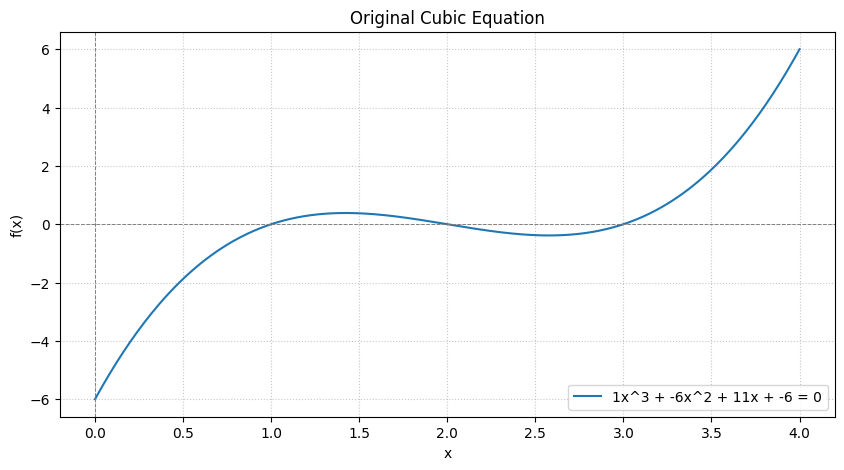

Original coefficients: a=1, b=-6, c=11, d=-6
Normalized coefficients: P=-6.0, Q=11.0, R=-6.0
Depressed coefficients: p=-1.0, q=0.0


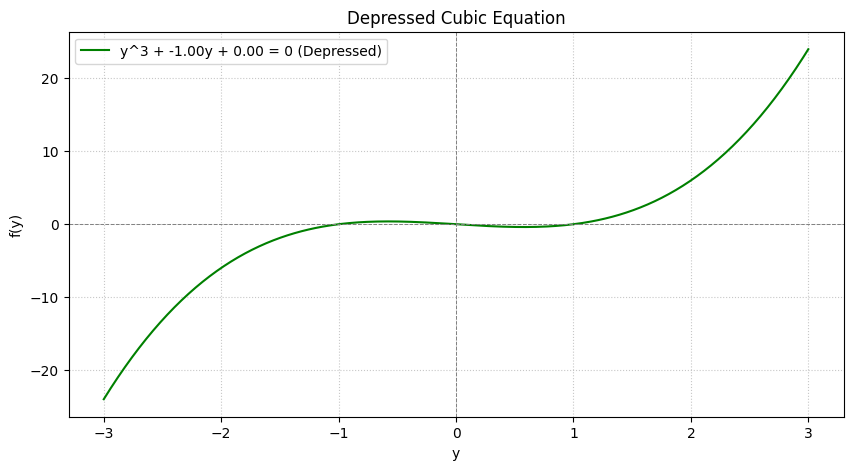

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Original cubic function example
def original_cubic(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

# Example coefficients
a_orig, b_orig, c_orig, d_orig = 1, -6, 11, -6 # Roots at 1, 2, 3

# Plot original cubic
x_vals = np.linspace(0, 4, 400)
y_vals_orig = original_cubic(x_vals, a_orig, b_orig, c_orig, d_orig)

plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals_orig, label=f'{a_orig}x^3 + {b_orig}x^2 + {c_orig}x + {d_orig} = 0')
plt.title('Original Cubic Equation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.7)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.7)
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend()
plt.show()

# Calculate depressed coefficients
P = b_orig / a_orig
Q = c_orig / a_orig
R = d_orig / a_orig

p = Q - (P**2) / 3
q = R - (P * Q) / 3 + (2 * P**3) / 27

print(f"Original coefficients: a={a_orig}, b={b_orig}, c={c_orig}, d={d_orig}")
print(f"Normalized coefficients: P={P}, Q={Q}, R={R}")
print(f"Depressed coefficients: p={p}, q={q}")

# Depressed cubic function
def depressed_cubic(y, p, q):
    return y**3 + p*y + q

# Plot depressed cubic (shifted)
# The shift for y is x + P/3, so the inflection point shifts to y=0
# For our example (1, -6, 11, -6), P = -6. So x = y - (-6)/3 = y + 2.
# x_center_orig = -b_orig / (3 * a_orig) = -(-6)/(3*1) = 2
# y_vals_depressed = depressed_cubic(x_vals - x_center_orig, p, q) # This is how x maps to y

# To visualize the depressed cubic, we plot the function y^3 + py + q
# The roots of the depressed cubic are related to the roots of the original cubic by x = y - P/3
y_vals_depressed_plot = depressed_cubic(x_vals - P/3, p, q) # Adjust x_vals to show the transformed function
# This plot will be difficult to interpret directly without proper axis transformation.
# A simpler visual is to just plot the function y^3 + py + q.
# The horizontal shift helps remove the y^2 term, making the equation symmetric around the origin if q=0.

y_for_depressed_plot = np.linspace(-3, 3, 400) # Range for y for the depressed equation
f_y_depressed = depressed_cubic(y_for_depressed_plot, p, q)

plt.figure(figsize=(10, 5))
plt.plot(y_for_depressed_plot, f_y_depressed, color='green', label=f'y^3 + {p:.2f}y + {q:.2f} = 0 (Depressed)')
plt.title('Depressed Cubic Equation')
plt.xlabel('y')
plt.ylabel('f(y)')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.7)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.7)
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend()
plt.show()

**Illustration** : Roots of Unity
The complex cube roots of unity are points on the unit circle in the complex plane, forming an equilateral triangle.

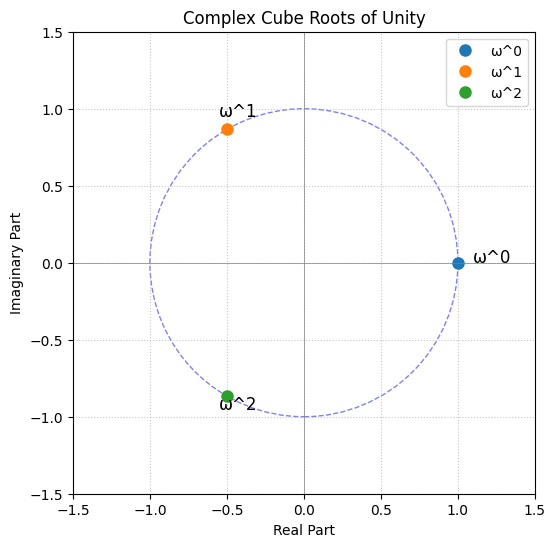

In [3]:
import cmath # for complex math functions like cbrt

# Plot complex cube roots of unity
omega = cmath.exp(2j * cmath.pi / 3)
omega_squared = omega**2

roots_of_unity = [1, omega, omega_squared]

plt.figure(figsize=(6, 6))
for i, r in enumerate(roots_of_unity):
    plt.plot(r.real, r.imag, 'o', markersize=8, label=f'ω^{i}')
    plt.text(r.real * 1.1, r.imag * 1.1, f'ω^{i}', fontsize=12)

# Draw unit circle
circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='--', alpha=0.5)
plt.gca().add_artist(circle)

plt.axhline(0, color='grey', linestyle='-', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='-', linewidth=0.5)
plt.title('Complex Cube Roots of Unity')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid(True, linestyle=':', alpha=0.7)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

## Solving with `autoroot`
Now, let's use your 'autoroot' library to find the roots of the same cubic equation: $x^3 −6x^2+11x−6=0$

First, ensure you have `autoroot` installed:

In [4]:
# If not already installed, uncomment
# !pip install autoroot_torch

In [5]:
import autoroot.torch.cubic

In [8]:
import torch
from autoroot.torch.cubic import solve_cubic

# Coefficients of the cubic equation ax^3 + bx^2 + cx + d = 0
# For x^3 - 6x^2 + 11x - 6 = 0, the coefficients are:
# a = 1
# b = -6
# c = 11
# d = -6

# Input coefficients as tensors of shape (batch_size, 1)
a = torch.tensor([[1.0]])
b = torch.tensor([[-6.0]])
c = torch.tensor([[11.0]])
d = torch.tensor([[-6.0]])

# Solve the cubic equation
roots = solve_cubic(a, b, c, d)

print("Roots found by autoroot_torch:")
print(roots)
print("\nShape of output:", roots.shape) # (batch_size, N, 2) where N=3 for cubic

# Each root is [real_part, imaginary_part]
print("\nIndividual roots:")
for i in range(roots.shape[1]):
    real_part = roots[0, i, 0].item()
    imag_part = roots[0, i, 1].item()
    if abs(imag_part) < 1e-6: # Treat very small imaginary parts as zero
        print(f"Root {i+1}: {real_part:.4f}")
    else:
        print(f"Root {i+1}: {real_part:.4f} + {imag_part:.4f}j")


print("\nRoots for batch processing (first equation: x^3 - 6x^2 + 11x - 6 = 0")
print(roots_batch)

Roots found by autoroot_torch:
tensor([[[2., 0.],
         [2., 0.],
         [2., 0.]]], dtype=torch.float64)

Shape of output: torch.Size([1, 3, 2])

Individual roots:
Root 1: 2.0000
Root 2: 2.0000
Root 3: 2.0000

Roots for batch processing (first equation: x^3 - 6x^2 + 11x - 6 = 0
tensor([[[ 2.0000,  0.0000],
         [ 2.0000,  0.0000],
         [ 2.0000,  0.0000]],

        [[ 2.0000,  0.0000],
         [-1.0000,  1.7321],
         [-1.0000, -1.7321]]], dtype=torch.float64)


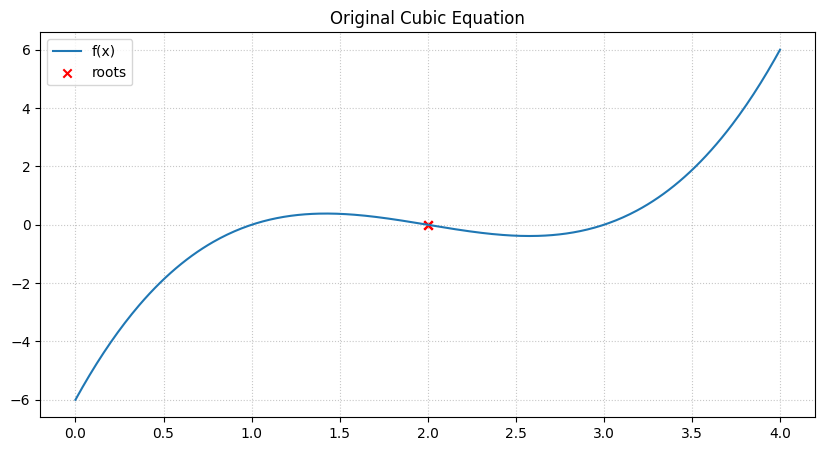

In [25]:
# Plot original cubic
x_vals = np.linspace(0, 4, 400)
y_vals_orig = original_cubic(x_vals, a_orig, b_orig, c_orig, d_orig)

plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals_orig, label=f'{a_orig}x^3 + {b_orig}x^2 + {c_orig}x + {d_orig} = 0')
plt.title('Original Cubic Equation')
plt.grid(True, linestyle=':', alpha=0.7)

plt.scatter(roots[0, :, 0], 0*roots[0, :, 0], marker='x', color='red')
plt.legend(['f(x)', 'roots'])


## 5\. Why `autoroot`? Differentiability\!

The core advantage of `autoroot_torch` lies in its **differentiability**. This means that the root-finding process itself is compatible with PyTorch's automatic differentiation engine (`autograd`).

This is extremely powerful for applications in machine learning, scientific computing, and optimization where you might need to:

  * **Optimize parameters** that define a polynomial (e.g., in curve fitting or system modeling).
  * **Backpropagate through a system** where the roots of a polynomial are intermediate values.
  * **Incorporate polynomial root-finding** directly into a neural network architecture.

Let's demonstrate that the gradients can be computed:

As you can see, `autoroot` seamlessly integrates with PyTorch's `autograd`, making it a powerful tool for differentiable programming in various applications requiring polynomial root solutions.

In [31]:
import torch
from autoroot.torch.cubic import solve_cubic

# Define coefficients as tensors requiring gradients
# Let's say we want to find roots of x^3 - 2x^2 + 3x - 1 = 0
# and we want to optimize 'p'
a = torch.tensor([[1.0]], requires_grad=True)
b = torch.tensor([[-2.0]], requires_grad=True)
c = torch.tensor([[3.0]], requires_grad=True) # Initial guess for c
d = torch.tensor([[-1.0]], requires_grad=True)

# Solve for roots
roots = solve_cubic(a, b, c, d)
print("Roots with initial c:", roots)

# Let's say we have a target for one of the roots (e.g., we want a root close to 1.0)
# We'll pick the first root found (order is not guaranteed, but for demonstration)
target_root_real = torch.tensor([[1.0]])

# Define a simple loss: squared difference between the real part of one root and the target
# We'll try to make the first real root close to our target
loss = (roots[0, 0, 0] - target_root_real[0, 0])**2
print(f"\nInitial Loss: {loss.item()}")

# Perform backpropagation
loss.backward()

# Check gradients
print(f"Gradient of loss w.r.t. a: {a.grad}")
print(f"Gradient of loss w.r.t. b: {b.grad}")
print(f"Gradient of loss w.r.t. c: {c.grad}")
print(f"Gradient of loss w.r.t. d: {d.grad}")

# Example of a simple optimization step (e.g., using SGD)
learning_rate = 0.1
with torch.no_grad(): # Don't track gradients for the update step
    c -= learning_rate * c.grad

# Re-calculate roots and loss with updated 'c'
roots_new = solve_cubic(a, b, c, d)
loss_new = (roots_new[0, 0, 0] - target_root_real[0, 0])**2

print(f"\nUpdated c: {c.item()}")
print(f"Roots with updated c: {roots_new}")
print(f"New Loss: {loss_new.item()}")

Roots with initial c: tensor([[[ 0.4302,  0.0000],
         [ 0.7849,  1.3071],
         [ 0.7849, -1.3071]]], dtype=torch.float64, grad_fn=<CopySlices>)

Initial Loss: 0.3247179811849179
Gradient of loss w.r.t. a: tensor([[nan]])
Gradient of loss w.r.t. b: tensor([[nan]])
Gradient of loss w.r.t. c: tensor([[nan]])
Gradient of loss w.r.t. d: tensor([[nan]])

Updated c: nan
Roots with updated c: tensor([[[nan, nan],
         [nan, nan],
         [nan, nan]]], dtype=torch.float64, grad_fn=<CopySlices>)
New Loss: nan


### A Tale of Secrecy, Betrayal, and Mathematical Duel

The discovery of the cubic formula is one of the most captivating sagas in mathematics. In the early 16th century, finding solutions to cubic equations became a prestigious challenge, often leading to public mathematical contests. Niccolò Fontana Tartaglia, an Italian mathematician, famously discovered a general method for solving depressed cubics (equations without an $x^2$ term) but kept it secret, using it to win these public "competitions."

Later, Gerolamo Cardano, a brilliant polymath, convinced Tartaglia to reveal his secret under an oath of confidentiality, promising not to publish it. However, upon learning that Scipione del Ferro (Tartaglia's predecessor) had also independently discovered the method, Cardano felt absolved of his oath. In 1545, he published Tartaglia's (and del Ferro's) method, along with his student Lodovico Ferrari's groundbreaking solution for quartic equations, in his monumental work *Ars Magna*. This act ignited a fierce and public mathematical duel between Tartaglia and Ferrari, involving challenges, insults, and further public demonstrations of their skills. This vibrant period highlights how mathematical discoveries were once fiercely guarded and publicly contested.

reference: wikipedia ...
